In [ ]:

from google.colab import files
files.upload()  # Upload your kaggle.json file here

# first of all from runtime change cpu to gpu

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usamajaved1","key":"1d1199e2374b68accd90424ce5110473"}'}

In [ ]:
!pip install kaggle



In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.applications.vgg16 import VGG16 # IMPORT A MODEL explain in reg

in previous files we see fine tunning through data augmentation now we use fine tunning

In [ ]:
# in this we not just remove last dense layer we remove the 2nd last conv layer too letss se how
conv_base = VGG16(
    weights ="imagenet",
    include_top = False, # mean we only use the conv base layer and remove dense layers as explain on reg
    input_shape= (150,150,3) # input shape of images
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
conv_base.summary() # we can see dense layers are removed

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # here we make it true
# conv_base.trainable = True # we allow conv_base weights to update we retrain  2ndlast layer and remaining take as it is they are coming from imagenet
# # now we create a for loop where we just select the 2nd last layer for train
# set_trainable = False
# for layer in conv_base.layers:
#   if layer.name=="block5_conv1":
#     set_trainable = True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False
# for layer in conv_base.layers:
#   print(layer.name,layer.trainable)
# Here we make the base convolutional network trainable.

# use chatgpt to add comments

conv_base.trainable = True  # Allow weights of the conv_base (pre-trained model) to be updated.
# This means we will retrain specific layers while keeping others frozen (using the pre-trained weights from ImageNet).

# Initialize a flag to control which layers are trainable.
set_trainable = False

# Loop through all layers in the convolutional base model (conv_base).
for layer in conv_base.layers:
    # When we reach the layer named "block5_conv1", set the flag to True.
    # This indicates that we want to start training from this layer onward.
    if layer.name == "block5_conv1":
        set_trainable = True

    # If the flag is True, make the current layer trainable (update its weights during training).
    if set_trainable:
        layer.trainable = True
    # Otherwise, keep the layer frozen (its weights will remain as they were pre-trained).
    else:
        layer.trainable = False

# Print the name of each layer and whether it is trainable or not.
for layer in conv_base.layers:
    print(layer.name, layer.trainable)


input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
# we can see till block four all the layers are frozen
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
# so we can see half are trainable
# now we create a model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
# generators also done in colab notebook and on register too
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    image_size = (150,150),
    batch_size = 32
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    image_size = (150,150),
    batch_size = 32
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
import tensorflow
def process(image,label):
  image = tensorflow.cast(image/255.,tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [ ]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=1e-5), # its a myth when we are doing fine tunning TAKE A VERY low learning rate
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [ ]:
history =model.fit(train_ds,epochs = 10,validation_data= test_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 121ms/step - accuracy: 0.8552 - loss: 0.3196 - val_accuracy: 0.9400 - val_loss: 0.1542
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 121ms/step - accuracy: 0.9408 - loss: 0.1466 - val_accuracy: 0.9422 - val_loss: 0.1382
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.9619 - loss: 0.0995 - val_accuracy: 0.9498 - val_loss: 0.1250
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.9766 - loss: 0.0704 - val_accuracy: 0.9518 - val_loss: 0.1269
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 106ms/step - accuracy: 0.9846 - loss: 0.0474 - val_accuracy: 0.9504 - val_loss: 0.1357
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.9909 - loss: 0.0313 - val_accuracy: 0.9568 - val_loss: 0.1271
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.9952 - loss: 0.0194 - val_accuracy: 0.9570 - val_loss: 0.1338
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.9973 - loss: 0

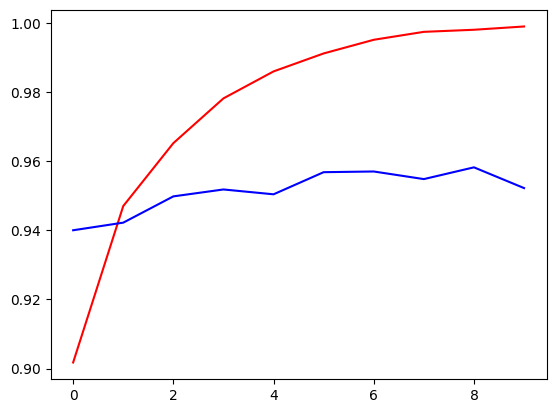

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color = "red",label = "train")
plt.plot(history.history["val_accuracy"],color = "blue",label = "test")

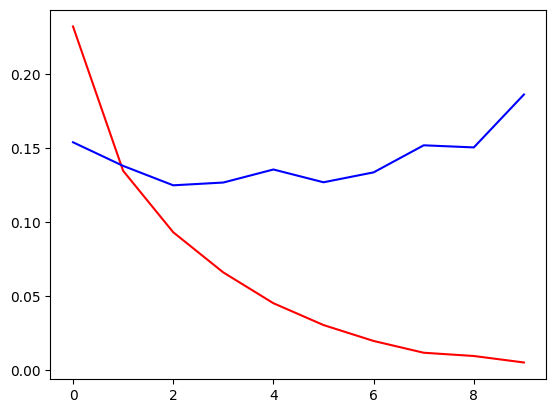

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color = "red",label = "train")
plt.plot(history.history["val_loss"],color = "blue",label = "test")


In [ ]:
# Code Explanation:

# In this implementation, I use TensorFlow and Keras to fine-tune a pre-trained VGG16 model on the Dogs vs Cats dataset. The pre-trained VGG16 model, which has been trained on the ImageNet dataset, is used as the base for feature extraction, while custom layers are added on top for binary classification (dogs vs cats).

# Key steps in the process:

# Data Preprocessing:
# The dataset is loaded using Keras' image_dataset_from_directory function, and images are resized to 150x150 for input into the VGG16 model.
# Normalization of image pixel values to a range between 0 and 1.
# Model Architecture:
# VGG16 Pre-trained Model: The convolutional base of VGG16 is used, excluding the fully connected layers (include_top=False). The model is designed for transfer learning.
# Trainable Layers: A specific set of layers (starting from the second-last convolution layer) are selected to be trainable, while the rest of the layers remain frozen to leverage the pre-trained weights.
# Fully Connected Layers: A Flatten layer is followed by a Dense layer with 256 units and a ReLU activation function, and the final output layer uses a sigmoid activation for binary classification.
# Training the Model:
# The model is compiled with the RMSprop optimizer (low learning rate, which is essential for fine-tuning).
# The loss function is binary crossentropy, and accuracy is monitored during training.
# Evaluation and Visualization:
# Accuracy and loss metrics are plotted for both the training and validation datasets to evaluate the model’s performance during training.
# Technologies/Tools Used:

# TensorFlow: For deep learning model development and training.
# Keras: High-level API for building and training the neural network.
# VGG16: A pre-trained model used as the base for transfer learning.
# RMSprop Optimizer: Fine-tuning the model with a low learning rate to avoid destroying the pre-trained weights.
# Key Features of the Implementation:

# Transfer Learning: Using a pre-trained model for feature extraction and fine-tuning it for a specific task.
# Efficient Fine-Tuning: Selecting specific layers for training to optimize the model’s learning.
# Binary Classification: Classifying images into two categories (dogs and cats) using a simple yet powerful architecture.
# Visualization: Plotting training and validation accuracy and loss for performance monitoring.
# I look forward to your feedback and suggestions on how to further improve this model. Feel free to share your thoughts!

# #TensorFlow #Keras #VGG16 #DeepLearning #TransferLearning #ImageClassification #AI #MachineLearning #DogsVsCats #DataScience #ArtificialIntelligence #TechCommunity #ComputerVision